# Developing a model that can classify iris flowers into different species 

Here we are given a dataset of different flowers and we need to prepare a model based on machine learning to distinguish them on the basis of their petal and sepal measurements.

We would first study the data and then make a model based on the training, we will make sure to create distinguishing factors and comparisons for each species so as to separate them on required factors.


## IMPORTING IMPORTANT LIBRARIES

These libraries are useful for performing function and to study the data 

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

### DOWNLOADING DATASETS

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### CATEGORISING

Here we are going to categorise the given data set on the basis of the species intended against the flower measurements.

Here we use the .factorize() function which gives the following numeric values

In [3]:
df['species'],categories = pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]>

This function is used for understanding the statistical information 

In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

We found that there is no null values in out dataset so there is no need to focus on averaging out or removing the rows and thus can continue with the same data.

## VISUALISING DATA 

To visualise the data here we had used the 3D plot for the same where we have used the Petal length , width and species as the axis factors

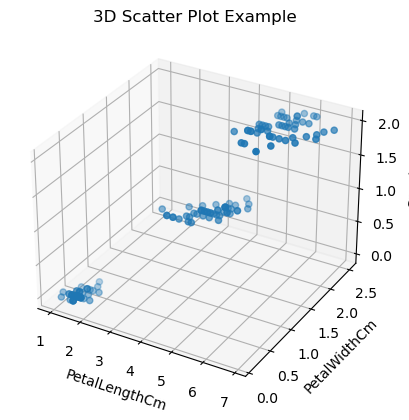

In [6]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.petal_length, df.petal_width, df.species)
ax.set_xlabel('PetalLengthCm')
ax.set_ylabel('PetalWidthCm')
ax.set_zlabel('Species')
plt.title('3D Scatter Plot Example')
plt.show()

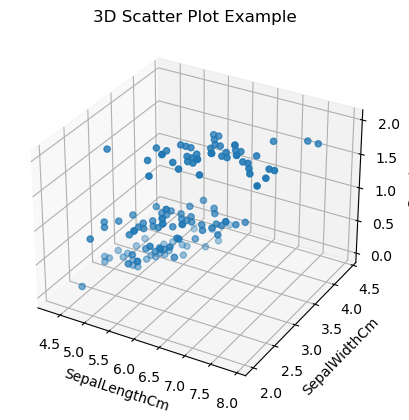

In [7]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.sepal_length, df.sepal_width, df.species)
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')
ax.set_zlabel('Species')
plt.title('3D Scatter Plot Example')
plt.show()

Upon perfroming the same with sepal separation we found that there is no such major distinguishing factor here so we will stick to petal for further doings

#### Using 2D scatter plot for visualising the data based on the basis of sepal and petals

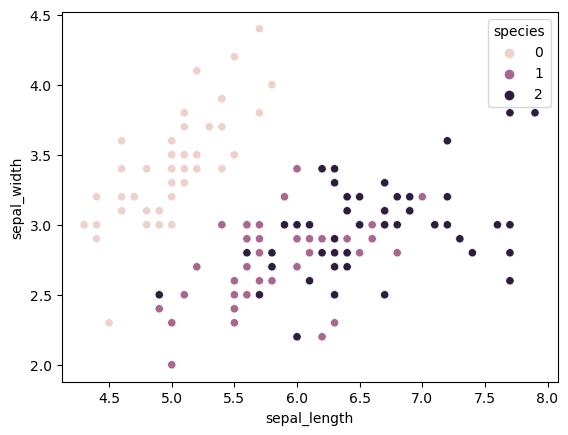

In [8]:

sns.scatterplot(data=df, x="sepal_length", y="sepal_width",hue="species");


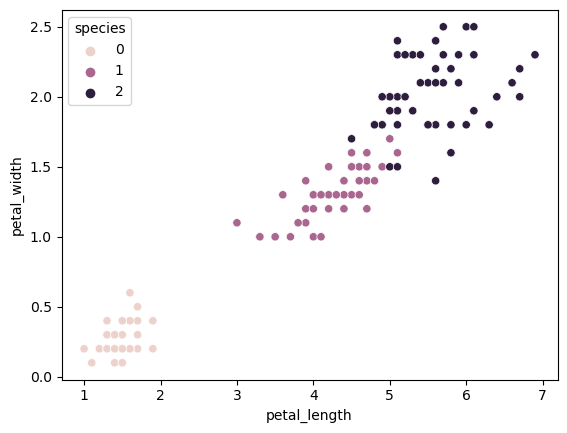

In [9]:
sns.scatterplot(data=df, x="petal_length", y="petal_width",hue="species");
     


### CLASSIFICATION

#### CLUSTERIZE

For classification we caq see thatr the sepal is not giving much of a differentiating factor so we will go wuth petal length and wdth for the model .

But we need to decide the cluster before that so we will be using 
##### Elbow technique

In [10]:

k_rng = range(1,10)
sse=[]

for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[[ 'petal_length', 'petal_width']])
  sse.append(km.inertia_)
     

In [11]:
sse

[550.6434666666668,
 86.40394533571003,
 31.38775897435898,
 19.49940089968511,
 13.933308757908758,
 11.10362366260479,
 9.225808730158729,
 7.640593062579724,
 6.472894541406307]

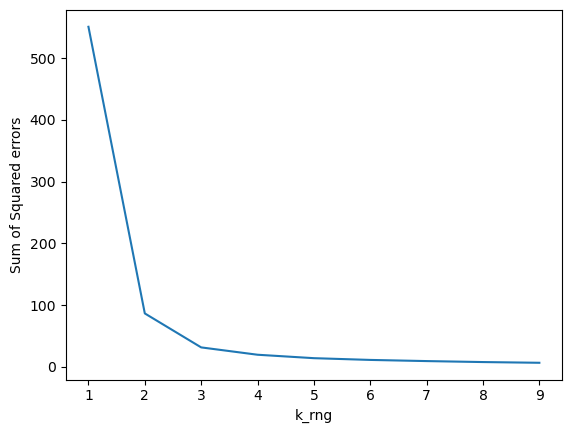

In [12]:
plt.xlabel('k_rng')
plt.ylabel("Sum of Squared errors")
plt.plot(k_rng, sse)

Here we can see that the elbow is formed at 3 which means the optimised cluster number is 3.

##### KMean Algorithm

In [13]:
km = KMeans(n_clusters=3,random_state=0,)
y_predicted = km.fit_predict(df[['petal_length','petal_width']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
df['cluster']=y_predicted
df.head(150)
     

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


### Checking Accuracy

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df.species, df.cluster)
cm

array([[ 0, 50,  0],
       [48,  0,  2],
       [ 4,  0, 46]], dtype=int64)

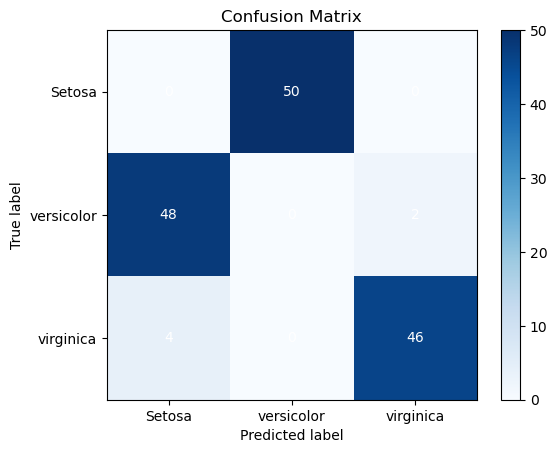

In [16]:
true_labels = df.species
predicted_labels= df.cluster

cm = confusion_matrix(true_labels, predicted_labels)
class_labels = ['Setosa', 'versicolor', 'virginica']

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Fill matrix with values
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='white')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


#### Spliting the dataset 
into features (measurements) and labels (species)

In [17]:
X = df.drop('species', axis=1)
y = df['species']

### Training and Testing

Split the dataset into training and testing sets with the help of sklearn library

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###### Training a K-Nearest Neighbors classifier on the training data

In [20]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

###### Predicting the species for the test data

Here we can check the species according to the character it holds.

In [21]:
y_pred = classifier.predict(X_test)

#### Checking accuracy 

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


The accuracy of this model is 100% which means it is a reliable model which given correct results everytime so we can trust the prediction of this model for all the cases

###### Observations and Outcomes 

We found that the major part of the data is of setosa species .

The major distinguishing factor is the petal dimensions i.e. petal length and petal width.

Sepal is not capable to completely distinguish the species in accordance to the modal required.

In [23]:
import os

In [27]:
os.getenv

<function os.getenv(key, default=None)>